<a href="https://colab.research.google.com/github/Kajcik/Projekty/blob/main/Analiza_Premier_League_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Źródło danych: https://www.football-data.co.uk/

# Zbiór danych dotyczących piłki nożnej zawiera szczegółowe informacje na temat wyników meczów z angielskiej Premier League,
# jednej z najpopularniejszych i najbardziej konkurencyjnych lig piłkarskich na świecie. Dane obejmują zarówno podstawowe wyniki,
# jak i szczegółowe statystyki, takie jak liczba strzałów, rzutów rożnych i wyniki meczów. Dostarczone informacje umożliwiają
# dogłębną analizę wyników i pozwalają na identyfikację wzorców związanych z przewagą gospodarzy lub różnicami w strategiach poszczególnych drużyn.
# Dzięki tym danym możemy badać takie trendy, jak średnia liczba goli na mecz, najczęstsze wyniki oraz porównywać efektywność
# występów drużyn u siebie i na wyjeździe. Wartość tego zbioru danych tkwi w jego wszechstronności, umożliwiając zarówno eksplorację
# historycznych trendów w wynikach, jak i prognozowanie przyszłych rezultatów, co czyni go interesującym zarówno dla analityków sportowych,
# jak i entuzjastów piłki nożnej.


In [3]:
# Import danych
premier_league_data = pd.read_csv('Premier_League.csv')

# Wyświetlenie kilku pierwszych wierszy, aby sprawdzić, czy import się powiódł
premier_league_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88


In [ ]:
# Powyżej znajduję się zbiór danych, który umożliwia analizę.

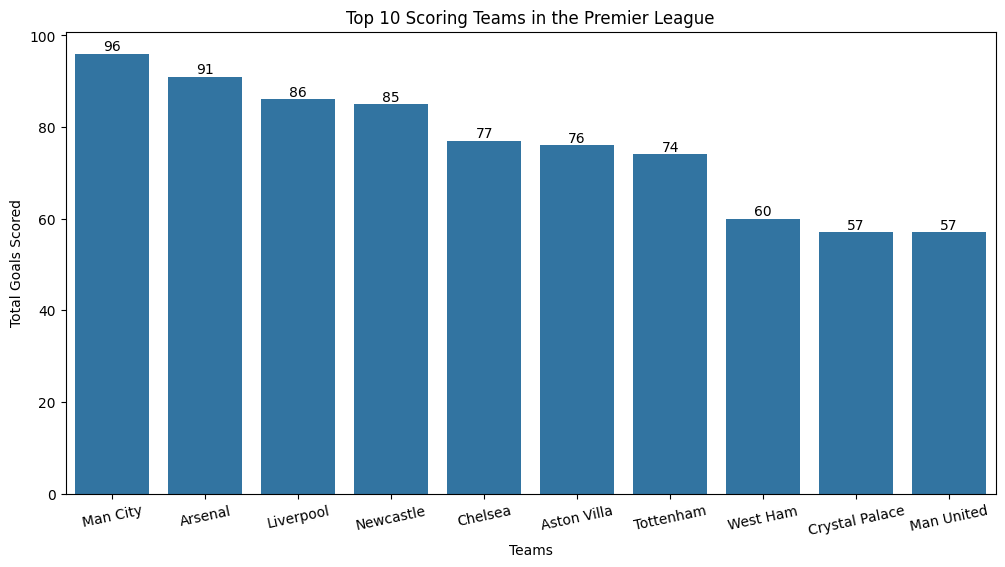

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suma goli dla drużyn jako gospodarze i goście
home_goals = premier_league_data.groupby('HomeTeam')['FTHG'].sum()
away_goals = premier_league_data.groupby('AwayTeam')['FTAG'].sum()
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)

# Wykres słupkowy dla 10 drużyn z największą ilością bramek
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=total_goals.head(10).index, y=total_goals.head(10).values)
plt.title('Top 10 Scoring Teams in the Premier League')
plt.xlabel('Teams')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=12)

# Dodawanie liczby bramek na słupkach
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)

plt.show()



In [ ]:
# Analizując dane, możemy dostrzec, że drużyny o najwyższych wynikach na pewno wyróżniają się nie tylko liczbą goli, ale również stylem gry.
# To może sugerować, że mają one silne jednostki ofensywne, skutecznych napastników oraz dobrze funkcjonujące systemy gry.

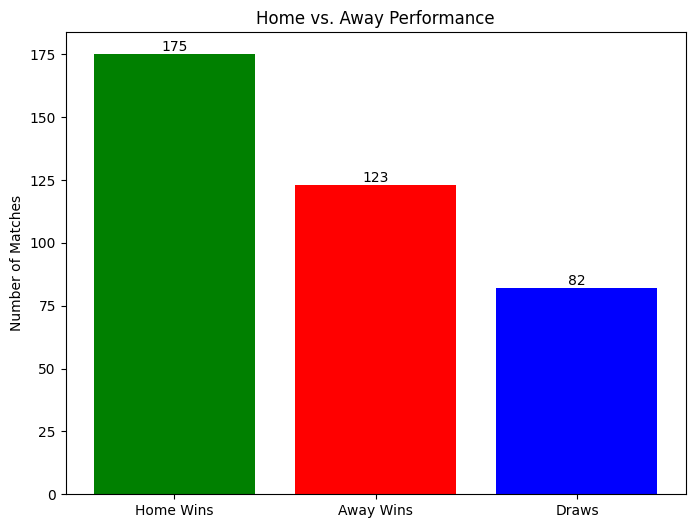

In [ ]:
# Liczba wygranych gospodarzy, gości oraz remisów
home_wins = premier_league_data[premier_league_data['FTR'] == 'H'].shape[0]
away_wins = premier_league_data[premier_league_data['FTR'] == 'A'].shape[0]
draws = premier_league_data[premier_league_data['FTR'] == 'D'].shape[0]

# Wykres słupkowy dla wyników
plt.figure(figsize=(8, 6))
bars = plt.bar(['Home Wins', 'Away Wins', 'Draws'], [home_wins, away_wins, draws], color=['green', 'red', 'blue'])
plt.title('Home vs. Away Performance')
plt.ylabel('Number of Matches')

# Dodanie wartości na słupkach
for bar in bars:
    yval = bar.get_height()  # Pobranie wysokości słupka
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [ ]:
# Wykres podkreśla istotną rolę przewagi własnego boiska w Premier League oraz zwraca uwagę na zaciętość rozgrywek,
# gdzie wiele meczów kończy się remisami. To cenne informacje dla trenerów, analityków i fanów,
# którzy mogą zyskać lepsze zrozumienie dynamiki rywalizacji w lidze.

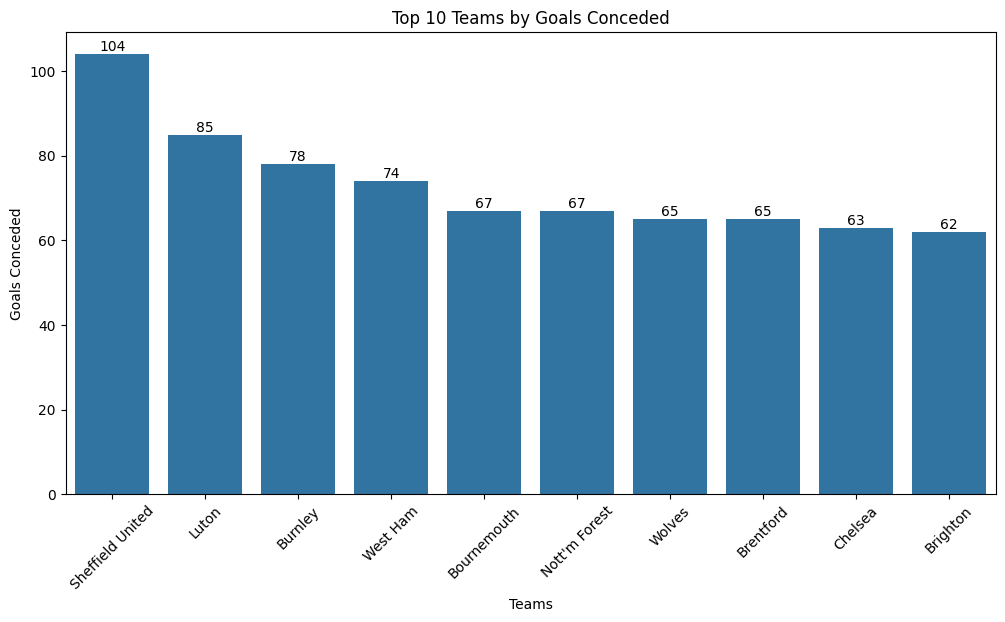

In [7]:
# Suma straconych goli przez każdą drużynę jako gospodarze i goście
home_goals_against = premier_league_data.groupby('HomeTeam')['FTAG'].sum()
away_goals_against = premier_league_data.groupby('AwayTeam')['FTHG'].sum()
total_goals_against = home_goals_against.add(away_goals_against, fill_value=0).sort_values(ascending=False)

# Wykres słupkowy dla drużyn z największą liczbą straconych goli
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=total_goals_against.head(10).index, y=total_goals_against.head(10).values)
plt.title('Top 10 Teams by Goals Conceded')
plt.xlabel('Teams')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45)

# Dodanie dokładnej liczby straconych bramek na słupkach
for index, value in enumerate(total_goals_against.head(10).values):
    plt.text(index, value, int(value), ha='center', va='bottom')

plt.show()



In [ ]:
#  Wykres pokazuje, które drużyny mają największe problemy w defensywie. Wysoka liczba straconych bramek wskazuje na problemy
# z organizacją gry obronnej, co może sugerować, że drużyny te borykają się z brakiem skuteczności w zatrzymywaniu przeciwników,
# a także być może z problemami indywidualnymi zawodników.

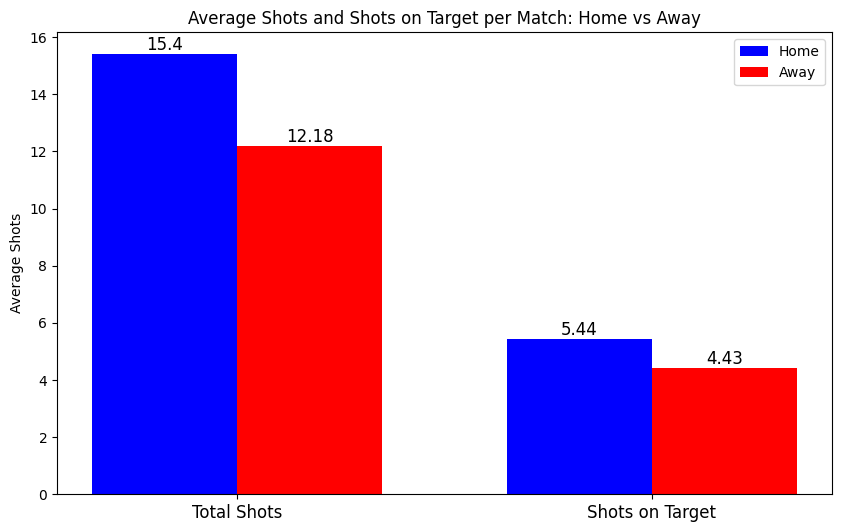

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sprawdzamy, czy kolumny dla strzałów i celnych strzałów istnieją
if 'HS' in premier_league_data.columns and 'AS' in premier_league_data.columns and 'HST' in premier_league_data.columns and 'AST' in premier_league_data.columns:
    avg_home_shots = premier_league_data['HS'].mean()
    avg_away_shots = premier_league_data['AS'].mean()
    avg_home_shots_on_target = premier_league_data['HST'].mean()
    avg_away_shots_on_target = premier_league_data['AST'].mean()

    # Ustawienia danych
    categories = ['Total Shots', 'Shots on Target']
    home_values = [avg_home_shots, avg_home_shots_on_target]
    away_values = [avg_away_shots, avg_away_shots_on_target]

    # Ustawienia pozycji dla dwóch grup słupków
    x = np.arange(len(categories))
    width = 0.35  # Szerokość słupka

    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(x - width/2, home_values, width, label='Home', color='blue')
    bars2 = plt.bar(x + width/2, away_values, width, label='Away', color='red')

    # Dodawanie wartości nad słupkami
    for bar in bars1 + bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

    # Etykiety i tytuł
    plt.xticks(x, categories, fontsize=12)
    plt.ylabel('Average Shots')
    plt.title('Average Shots and Shots on Target per Match: Home vs Away')
    plt.legend(loc='upper right')

    plt.show()
else:
    print("Columns for shots (HS, AS) and shots on target (HST, AST) are not available in the dataset.")





In [ ]:
#Z wykresu wynika, że drużyny gospodarzy oddają średnio więcej strzałów niż drużyny gości.Taki trend może sugerować,
# że drużyny grające na własnym boisku mają większą kontrolę nad meczem i są bardziej skłonne do podejmowania ofensywnych działań.



Top 10 Highest Scoring Matches:
             HomeTeam     AwayTeam  FTHG  FTAG  TotalGoals
58   Sheffield United    Newcastle     0     8           8
119           Chelsea     Man City     4     4           8
221         Newcastle        Luton     4     4           8
32            Burnley    Tottenham     2     5           7
59        Aston Villa     Brighton     6     1           7
104          Man City  Bournemouth     6     1           7
137         Liverpool       Fulham     4     3           7
141             Luton      Arsenal     3     4           7
217            Wolves   Man United     3     4           7
278       Bournemouth        Luton     4     3           7


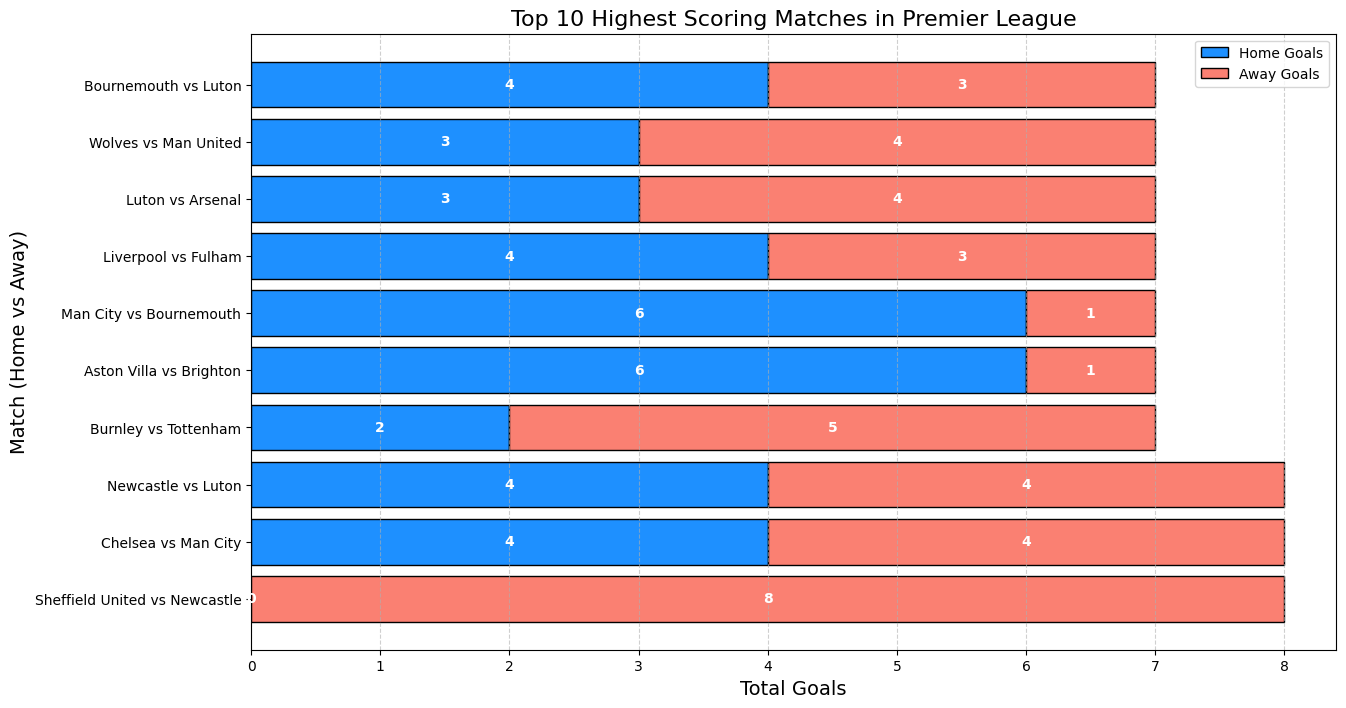

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tworzenie kolumny z sumą goli na mecz
premier_league_data['TotalGoals'] = premier_league_data['FTHG'] + premier_league_data['FTAG']

# Wybór meczów z największą liczbą goli
high_scoring_matches = premier_league_data.nlargest(10, 'TotalGoals')[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'TotalGoals']]

print("Top 10 Highest Scoring Matches:")
print(high_scoring_matches)

# Przygotowanie danych do wykresu
teams = [f"{home} vs {away}" for home, away in zip(high_scoring_matches['HomeTeam'], high_scoring_matches['AwayTeam'])]
total_goals = high_scoring_matches['TotalGoals'].tolist()
home_goals = high_scoring_matches['FTHG'].tolist()
away_goals = high_scoring_matches['FTAG'].tolist()

# Wykres słupkowy dla 10 meczów z największą liczbą goli z podziałem na gole gospodarzy i gości
fig, ax = plt.subplots(figsize=(14, 8))

# Tworzenie kolorowego słupka z podziałem na gole gospodarzy i gości
bars_home = ax.barh(teams, home_goals, color='dodgerblue', edgecolor='black', label='Home Goals')
bars_away = ax.barh(teams, away_goals, left=home_goals, color='salmon', edgecolor='black', label='Away Goals')

# Dodanie wartości liczby goli nad słupkami dla gospodarzy i gości
for i, (h_goals, a_goals) in enumerate(zip(home_goals, away_goals)):
    ax.text(h_goals / 2, i, f"{h_goals}", ha='center', va='center', color='white', fontweight='bold')
    ax.text(h_goals + a_goals / 2, i, f"{a_goals}", ha='center', va='center', color='white', fontweight='bold')

# Dodanie legendy, tytułu i osi
plt.title('Top 10 Highest Scoring Matches in Premier League', fontsize=16)
plt.xlabel('Total Goals', fontsize=14)
plt.ylabel('Match (Home vs Away)', fontsize=14)
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()




In [ ]:
# Podsumowując, wykres ilustruje fascynujące wyniki meczów z Premier League, które były niezwykle emocjonujące
# i pokazujące potencjał ofensywny drużyn. Analizując te dane, trenerzy i analitycy mogą wyciągać cenne wnioski,
# które mogą pomóc w dalszym rozwoju drużyn.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Tworzenie danych przepływów (gole gospodarzy i gości)
result_counts = premier_league_data.groupby(['FTHG', 'FTAG']).size().reset_index(name='Count')

# Lista unikalnych goli gospodarzy i gości
home_goals = result_counts['FTHG'].unique().tolist()
away_goals = result_counts['FTAG'].unique().tolist()

# Indeksowanie gospodarzy i gości jako unikalne kategorie
all_goals = list(set(home_goals + away_goals))
node_labels = [f'Home: {i}' for i in home_goals] + [f'Away: {i}' for i in away_goals]

# Mapowanie goli na indeksy
node_mapping = {goal: i for i, goal in enumerate(all_goals)}

# Źródła (gole gospodarzy) i cele (gole gości) przepływów
sources = result_counts['FTHG'].map(node_mapping)
targets = result_counts['FTAG'].map(node_mapping)

# Tworzenie wykresu Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=sources,  # Gole gospodarzy
        target=targets + len(home_goals),  # Gole gości
        value=result_counts['Count']  # Liczba wystąpień danego wyniku
    )
))

fig.update_layout(title_text="Sankey Diagram of Match Results (Home Goals to Away Goals)", font_size=10)
fig.show()

In [ ]:
# Diagram ilustruje, jak często konkretne liczby goli zdobyte przez gospodarzy przekładają się na odpowiednie liczby
# goli zdobytych przez gości. Grube linie reprezentują wyniki, które miały większe znaczenie w rozgrywkach, co oznacza,
# że te wyniki miały miejsce w większej liczbie meczów.

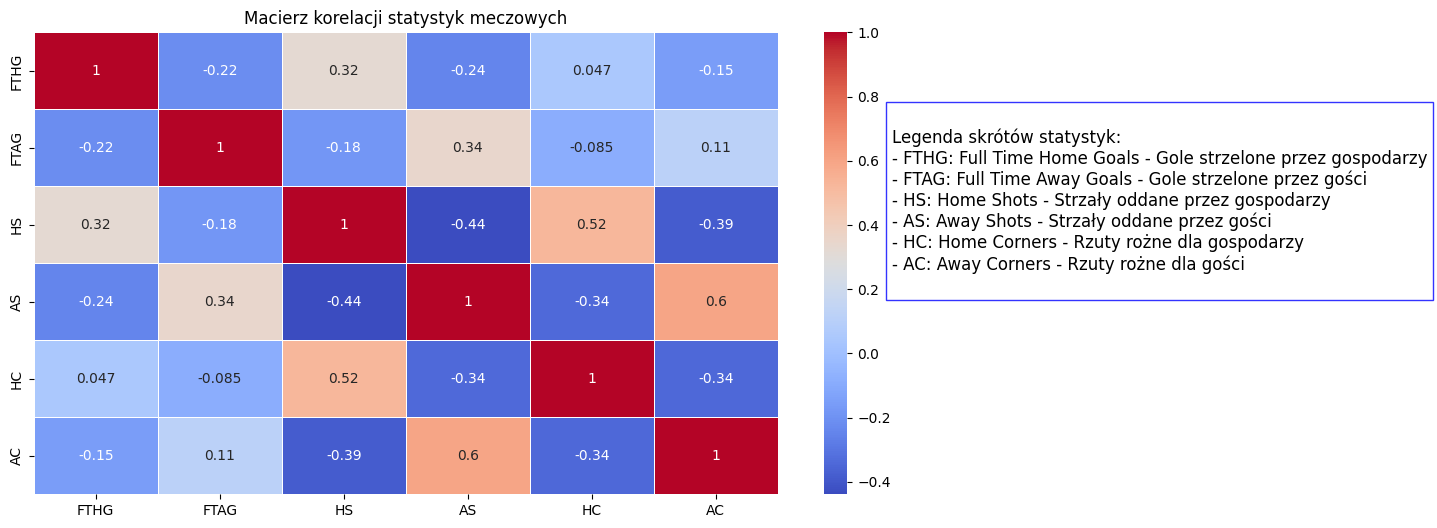

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Załaduj dane (upewnij się, że premier_league_data jest już zdefiniowane)

# Tworzenie macierzy korelacji
corr_matrix = premier_league_data[['FTHG', 'FTAG', 'HS', 'AS', 'HC', 'AC']].corr()

# Wyświetlanie macierzy korelacji
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Tytuł wykresu
plt.title('Macierz korelacji statystyk meczowych')

# Dodanie legendy jako tekstu z boku wykresu
legend_text = """
Legenda skrótów statystyk:
- FTHG: Full Time Home Goals - Gole strzelone przez gospodarzy
- FTAG: Full Time Away Goals - Gole strzelone przez gości
- HS: Home Shots - Strzały oddane przez gospodarzy
- AS: Away Shots - Strzały oddane przez gości
- HC: Home Corners - Rzuty rożne dla gospodarzy
- AC: Away Corners - Rzuty rożne dla gości
"""

# Umieszczanie tekstu obok wykresu
plt.gcf().text(0.84, 0.45, legend_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue'))

plt.show()


In [ ]:
# Macierz korelacji dostarcza cennych informacji na temat relacji między różnymi statystykami meczowymi.
# Najsilniejszą korelację można zaobserwować między liczbą goli strzelanych przez gospodarzy a liczbą ich strzałów,
# co wskazuje na to, że skuteczność ataku jest ściśle związana z aktywnością ofensywną. Wysokie korelacje między strzałami,
# a golami dla obu drużyn podkreślają znaczenie generowania okazji do strzałów w kontekście skuteczności zdobywania bramek.
# To informacje, które mogą być cenne dla trenerów i analityków podczas planowania strategii meczowych.

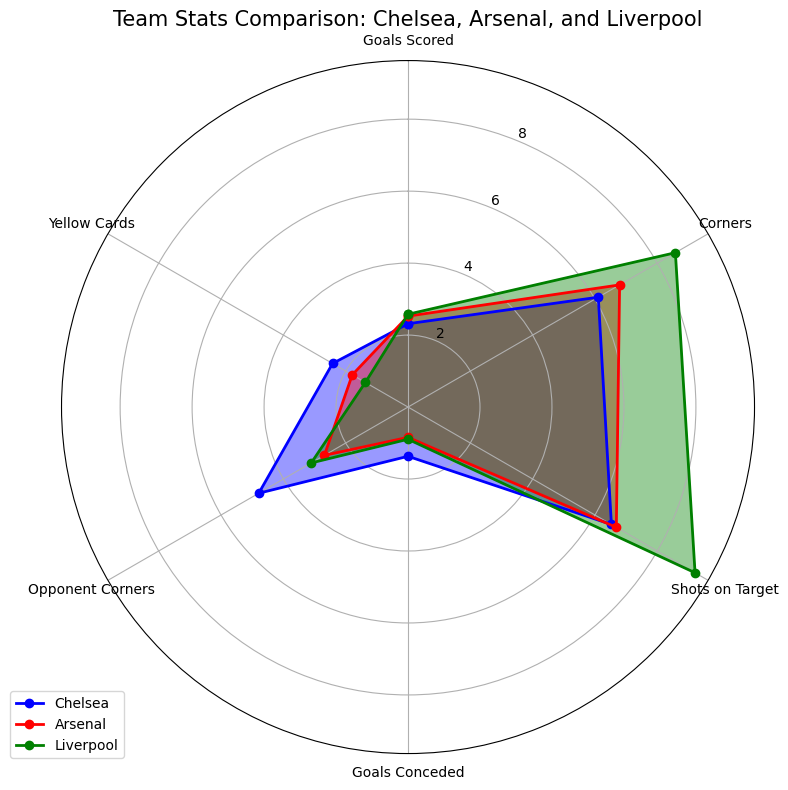

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Wybieramy dane dla trzech zespołów (np. Chelsea, Arsenal, Liverpool) i obliczamy średnie wartości statystyk
chelsea_stats = premier_league_data[premier_league_data['HomeTeam'] == 'Chelsea'][['FTHG', 'HC', 'HST', 'FTAG', 'AC', 'HY']].mean()
arsenal_stats = premier_league_data[premier_league_data['HomeTeam'] == 'Arsenal'][['FTHG', 'HC', 'HST', 'FTAG', 'AC', 'HY']].mean()
liverpool_stats = premier_league_data[premier_league_data['HomeTeam'] == 'Liverpool'][['FTHG', 'HC', 'HST', 'FTAG', 'AC', 'HY']].mean()

# Nazwy kategorii (statystyki)
categories = ['Goals Scored', 'Corners', 'Shots on Target', 'Goals Conceded', 'Opponent Corners', 'Yellow Cards']

# Tworzenie danych do wykresu radarowego
chelsea_values = chelsea_stats.tolist()
arsenal_values = arsenal_stats.tolist()
liverpool_values = liverpool_stats.tolist()

# Dodanie pierwszego elementu, aby zamknąć wykres
chelsea_values += chelsea_values[:1]
arsenal_values += arsenal_values[:1]
liverpool_values += liverpool_values[:1]

# Liczba osi
N = len(categories)

# Ustawienie kątów dla osi
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Tworzenie wykresu radarowego
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Tło siatki
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Wykres Chelsea
ax.plot(angles, chelsea_values, linewidth=2, linestyle='solid', label='Chelsea', color='blue', marker='o')
ax.fill(angles, chelsea_values, color='blue', alpha=0.4)

# Wykres Arsenal
ax.plot(angles, arsenal_values, linewidth=2, linestyle='solid', label='Arsenal', color='red', marker='o')
ax.fill(angles, arsenal_values, color='red', alpha=0.4)

# Wykres Liverpool
ax.plot(angles, liverpool_values, linewidth=2, linestyle='solid', label='Liverpool', color='green', marker='o')
ax.fill(angles, liverpool_values, color='green', alpha=0.4)

# Etykiety osi
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Tytuł wykresu
plt.title('Team Stats Comparison: Chelsea, Arsenal, and Liverpool', size=15, color='black')

# Dodanie legendy
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



plt.show()


In [ ]:
# Wykres radarowy dostarcza wizualnych informacji na temat różnych aspektów gry każdej z drużyn.
# Chelsea i Liverpool prezentują się najlepiej w kategorii strzelonych goli i strzałów celnych,
# podczas gdy Arsenal jest nieco gorszy w tych statystykach. Rzuty rożne i żółte kartki również
# wskazują na różnice w stylu gry, co może być użyteczne dla trenerów i analityków przy planowaniu
# strategii na nadchodzące mecze. W sumie, wykres pozwala na zrozumienie, które obszary wymagają
# poprawy w każdej drużynie, aby zwiększyć ich szanse na sukces w Premier League.

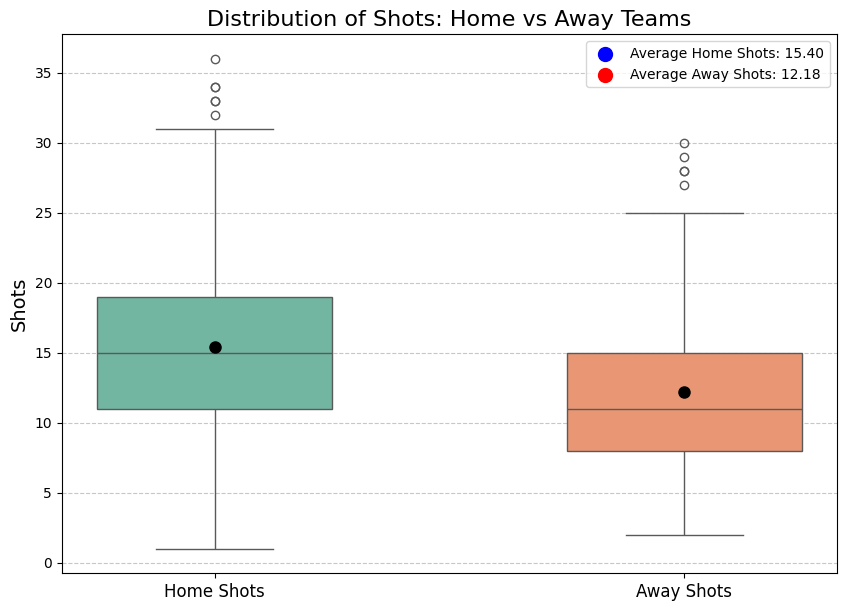

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wykres pudełkowy dla liczby strzałów gospodarzy i gości
plt.figure(figsize=(10, 7))

# Rysowanie wykresu pudełkowego
sns.boxplot(data=premier_league_data[['HS', 'AS']], palette="Set2", width=0.5, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 8})

# Dodanie średniej liczby strzałów jako kropki
mean_home_shots = premier_league_data['HS'].mean()
mean_away_shots = premier_league_data['AS'].mean()
plt.scatter([0], [mean_home_shots], color='blue', s=100, label=f'Average Home Shots: {mean_home_shots:.2f}')
plt.scatter([1], [mean_away_shots], color='red', s=100, label=f'Average Away Shots: {mean_away_shots:.2f}')

# Ustawienia osi i tytuł
plt.xticks([0, 1], ['Home Shots', 'Away Shots'], fontsize=12)
plt.title('Distribution of Shots: Home vs Away Teams', fontsize=16)
plt.ylabel('Shots', fontsize=14)

# Linie siatki dla ułatwienia odczytu
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Dodanie legendy
plt.legend(loc='upper right', fontsize=10)

plt.show()




In [ ]:
# Wykres pudełkowy dostarcza cennych informacji na temat efektywności ofensywnej drużyn w Premier League.
# Wyższa średnia liczba strzałów gospodarzy oraz większy rozkład wartości sugerują, że drużyny grające u siebie
# są bardziej skłonne do ofensywnej gry, co może być istotnym czynnikiem w analizie wyników meczów.
# W przyszłych analizach warto zbadać, jakie czynniki mogą wpływać na te różnice,
# na przykład styl gry drużyn, jakość rywala czy warunki meczowe.

# Nowa sekcja

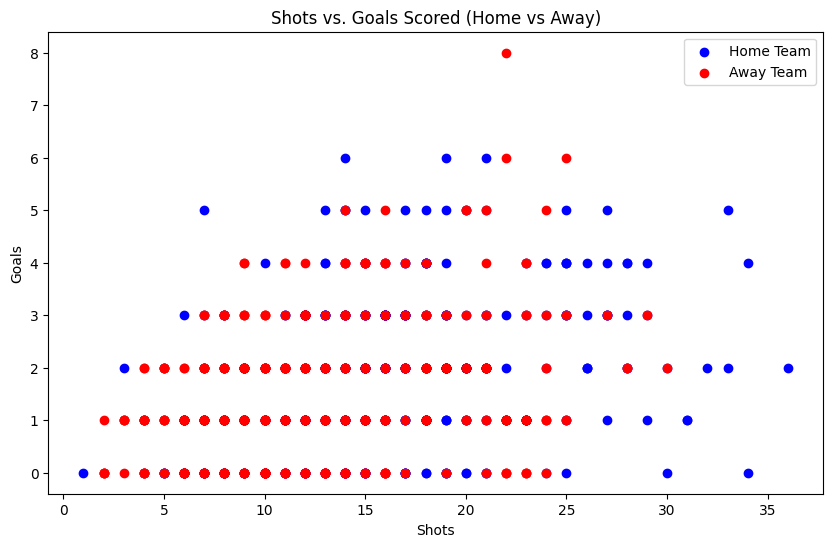

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(premier_league_data['HS'], premier_league_data['FTHG'], color='blue', label='Home Team')
plt.scatter(premier_league_data['AS'], premier_league_data['FTAG'], color='red', label='Away Team')
plt.title('Shots vs. Goals Scored (Home vs Away)')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.legend()
plt.show()


In [ ]:
#Z perspektywy analitycznej, możliwość porównania liczby strzałów do goli zdobytych pozwala na głębsze zrozumienie efektywności ataków drużyn
# oraz ich umiejętności wykorzystywania stworzonych sytuacji bramkowych. Obserwacja trendów w tej analizie może wskazywać na kluczowe aspekty,
# takie jak dominacja drużyn grających u siebie, co może sugerować, że czynniki takie jak wsparcie kibiców czy znajomość boiska mają istotny wpływ na wyniki.

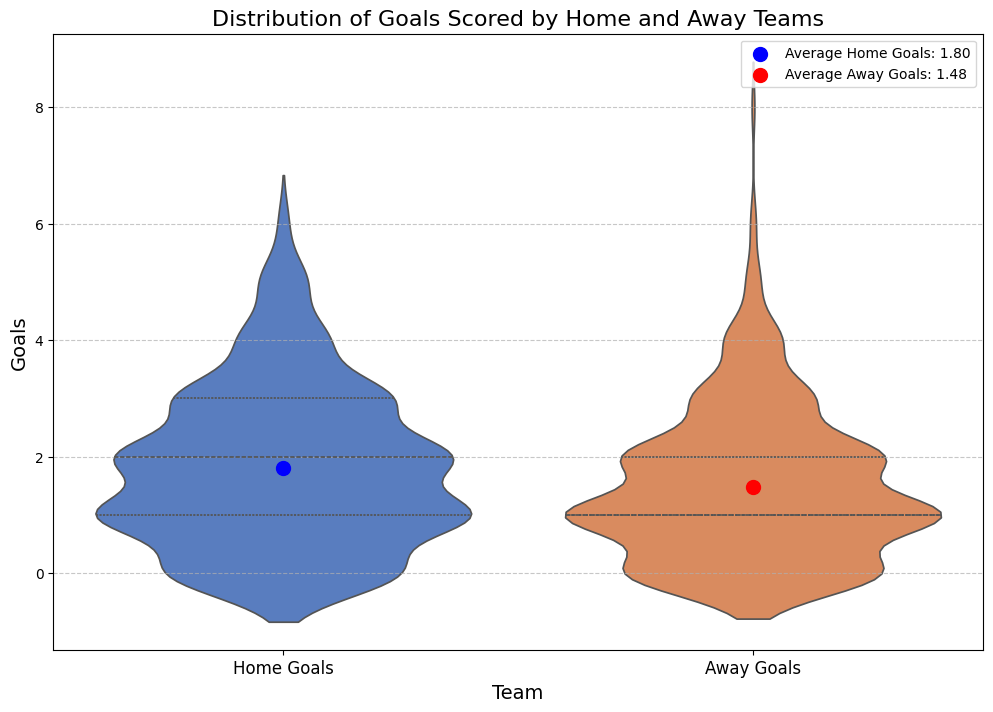

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wykres violin dla bramek gospodarzy i gości
plt.figure(figsize=(12, 8))
sns.violinplot(data=premier_league_data[['FTHG', 'FTAG']], palette='muted', inner='quartile')
plt.title('Distribution of Goals Scored by Home and Away Teams', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.xticks([0, 1], ['Home Goals', 'Away Goals'], fontsize=12)  # Przypisanie etykiet osi

# Dodanie średnich wartości jako punktów na wykresie
avg_home_goals = premier_league_data['FTHG'].mean()
avg_away_goals = premier_league_data['FTAG'].mean()
plt.scatter(0, avg_home_goals, color='blue', s=100, label=f'Average Home Goals: {avg_home_goals:.2f}')
plt.scatter(1, avg_away_goals, color='red', s=100, label=f'Average Away Goals: {avg_away_goals:.2f}')

# Linia siatki dla łatwiejszego odczytu
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Dodanie legendy
plt.legend(loc='upper right', fontsize=10)

plt.show()


In [ ]:
#Ogólnie rzecz biorąc, wykres ten potwierdza, że drużyny grające u siebie mają tendencję do zdobywania większej liczby bramek.
#To odkrycie jest zgodne z ogólną teorią, że efekt "własnego boiska" daje gospodarzom przewagę w meczu.
#Wartość tego wykresu polega na uwidocznieniu szczegółów rozkładu wyników, które wykraczają poza same średnie,
#dostarczając pełniejszego obrazu tego, jak zmienia się liczba strzelanych bramek w zależności od roli drużyny.